In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 


%matplotlib inline

In [26]:
df = pd.read_csv('data/ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [27]:
Methane_bin = []
Ethylene_bin = []

for i in df['Methane']:
    if i > 0.0: 
        Methane_bin.append(int(1))
    else:
        Methane_bin.append(int(0))
for i in df['Ethylene']:
    if i > 0.0: 
        Ethylene_bin.append(int(1))
    else:
        Ethylene_bin.append(int(0))

df['Methane Bin'] = Methane_bin
df['Ethylene Bin'] = Ethylene_bin

In [28]:
df.head()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,...,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49,0,0
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,...,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03,0,0
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,...,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24,0,0
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,...,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84,0,0
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,...,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59,0,0


In [29]:
df.describe()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
count,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,...,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06
mean,2.089566e+04,5.808503e+01,4.369478e+00,2.520157e+03,1.711449e+03,2.756596e+03,3.035848e+03,1.863258e+03,2.386329e+03,2.689914e+03,...,3.541804e+03,2.823842e+03,2.301598e+03,2.024606e+03,1.687490e+03,1.806279e+03,2.309401e+03,1.862996e+03,4.426828e-01,4.314846e-01
std,1.206404e+04,7.663941e+01,5.521296e+00,2.532045e+02,1.184762e+02,1.150495e+03,1.252085e+03,1.104965e+03,1.425092e+03,1.102780e+03,...,2.607058e+02,2.002925e+02,9.875315e+02,8.246309e+02,9.865598e+02,1.102382e+03,9.652522e+02,7.658043e+02,4.967039e-01,4.952834e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.648000e+01,1.568880e+03,-4.778000e+01,-6.830000e+00,-1.268000e+01,-4.198000e+01,-1.528000e+01,...,2.976530e+03,2.367650e+03,6.898700e+02,5.817900e+02,4.433000e+02,4.239800e+02,7.713900e+02,5.890900e+02,0.000000e+00,0.000000e+00
25%,1.044672e+04,0.000000e+00,0.000000e+00,2.335120e+03,1.639010e+03,1.581310e+03,1.750760e+03,8.197600e+02,1.061500e+03,1.533260e+03,...,3.344630e+03,2.672740e+03,1.409680e+03,1.201660e+03,7.593200e+02,7.685600e+02,1.424110e+03,1.113520e+03,0.000000e+00,0.000000e+00
50%,2.089672e+04,0.000000e+00,0.000000e+00,2.463490e+03,1.701300e+03,2.885640e+03,3.199850e+03,1.393180e+03,1.688830e+03,2.785620e+03,...,3.481370e+03,2.782960e+03,2.174530e+03,2.072150e+03,1.266570e+03,1.332660e+03,2.165370e+03,1.839750e+03,0.000000e+00,0.000000e+00
75%,3.134324e+04,1.000000e+02,8.330000e+00,2.676930e+03,1.754580e+03,3.798990e+03,4.172030e+03,2.813350e+03,3.605260e+03,3.610690e+03,...,3.708470e+03,2.943730e+03,3.140840e+03,2.701560e+03,2.543380e+03,2.746090e+03,3.123440e+03,2.506360e+03,1.000000e+00,1.000000e+00
max,4.179019e+04,2.966700e+02,2.000000e+01,3.402560e+03,9.825750e+03,5.567440e+03,6.127680e+03,4.420840e+03,5.707530e+03,5.304140e+03,...,4.436430e+03,3.519340e+03,4.849910e+03,4.062070e+03,4.540980e+03,5.108820e+03,4.699970e+03,3.764370e+03,1.000000e+00,1.000000e+00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Time          float64
 1   Methane       float64
 2   Ethylene      float64
 3   1             float64
 4   2             float64
 5   3             float64
 6   4             float64
 7   5             float64
 8   6             float64
 9   7             float64
 10  8             float64
 11  9             float64
 12  10            float64
 13  11            float64
 14  12            float64
 15  13            float64
 16  14            float64
 17  15            float64
 18  16            float64
 19  Methane Bin   int64  
 20  Ethylene Bin  int64  
dtypes: float64(19), int64(2)
memory usage: 669.5 MB


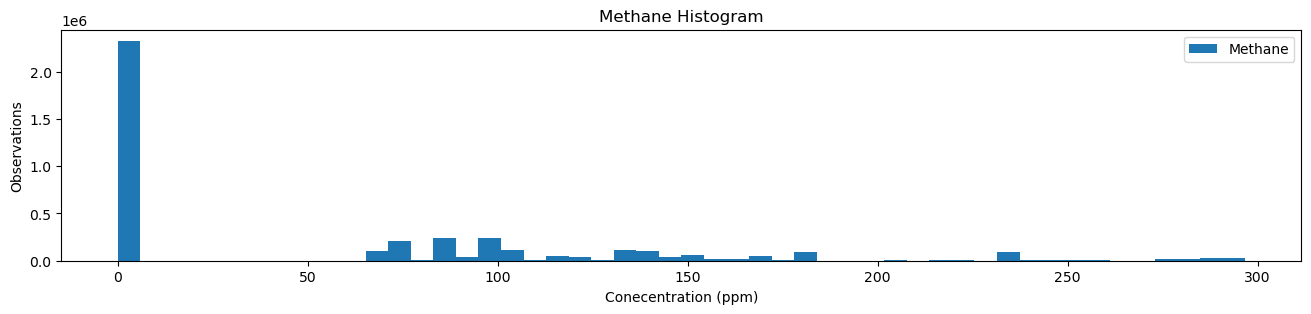

In [31]:
#  Plot histogram of Methane and Ethylene
#  Methane is the first column in the dataset
#  We are using 50 bins for the histogram
plt.figure(figsize=(16,3))
plt.hist(df.Methane,50,label="Methane")
plt.legend(loc='upper right')
plt.xlabel("Conecentration (ppm)")
plt.ylabel("Observations")
plt.title("Methane Histogram") 
plt.show()


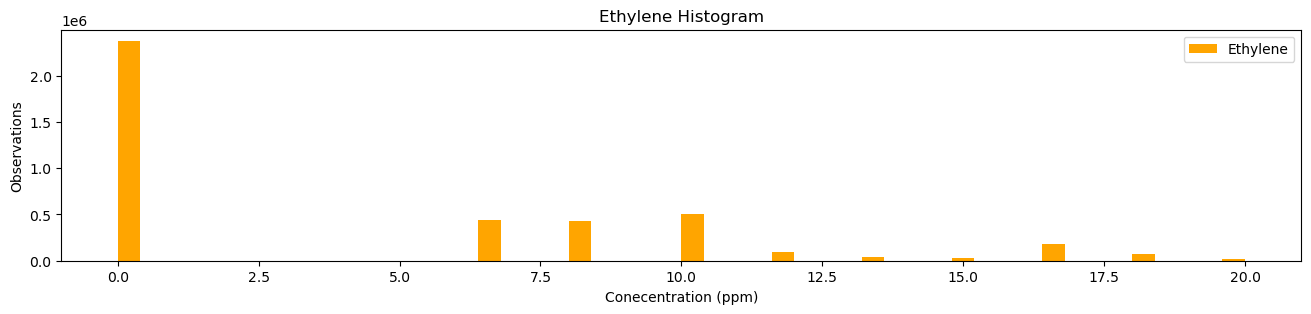

In [32]:
# Histogram of Ethylene to see the distribution of the data
plt.figure(figsize=(16,3))
plt.hist(df.Ethylene,50,label="Ethylene", color='orange')
plt.legend(loc='upper right')
plt.xlabel("Conecentration (ppm)")
plt.ylabel("Observations")
plt.title("Ethylene Histogram")
plt.show()

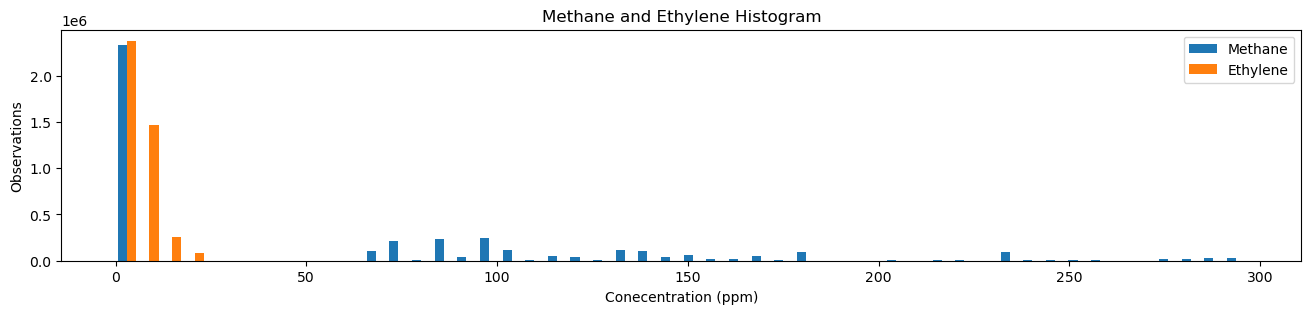

In [33]:
#  Plot histogram of Methane and Ethylene to see the distribution of the data in the same plot

plt.figure(figsize=(16,3))
plt.hist([df.Methane, df.Ethylene],50,label=["Methane", "Ethylene"])
plt.legend(loc='upper right')
plt.xlabel("Conecentration (ppm)")
plt.ylabel("Observations")
plt.title("Methane and Ethylene Histogram")
plt.show()

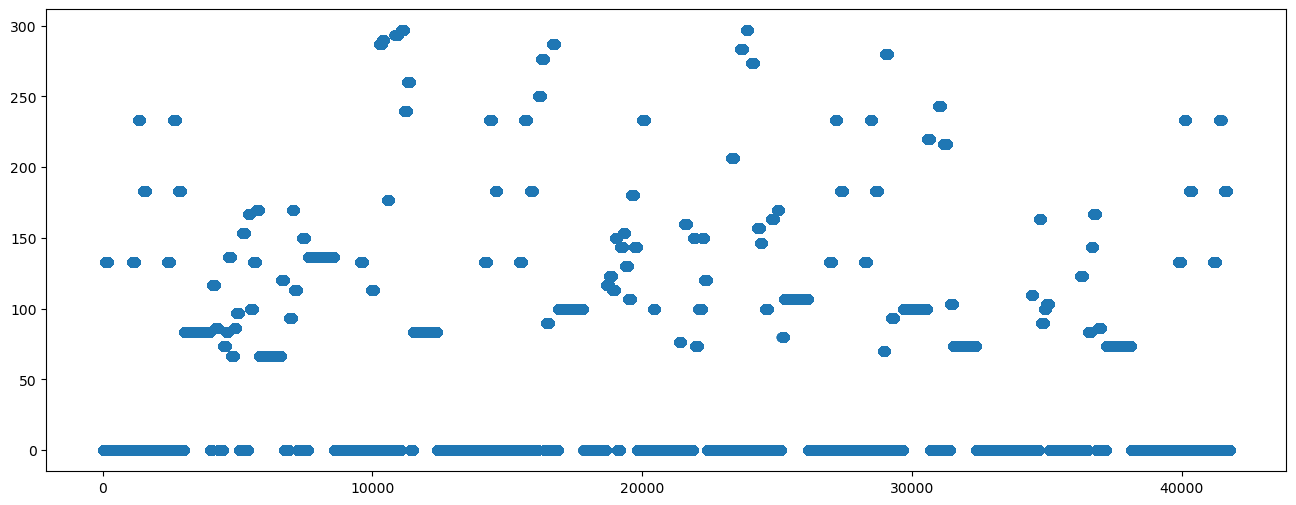

In [34]:
%matplotlib inline
plt.figure(figsize=(16,6))
plt.scatter(df['Time'],df['Methane'])

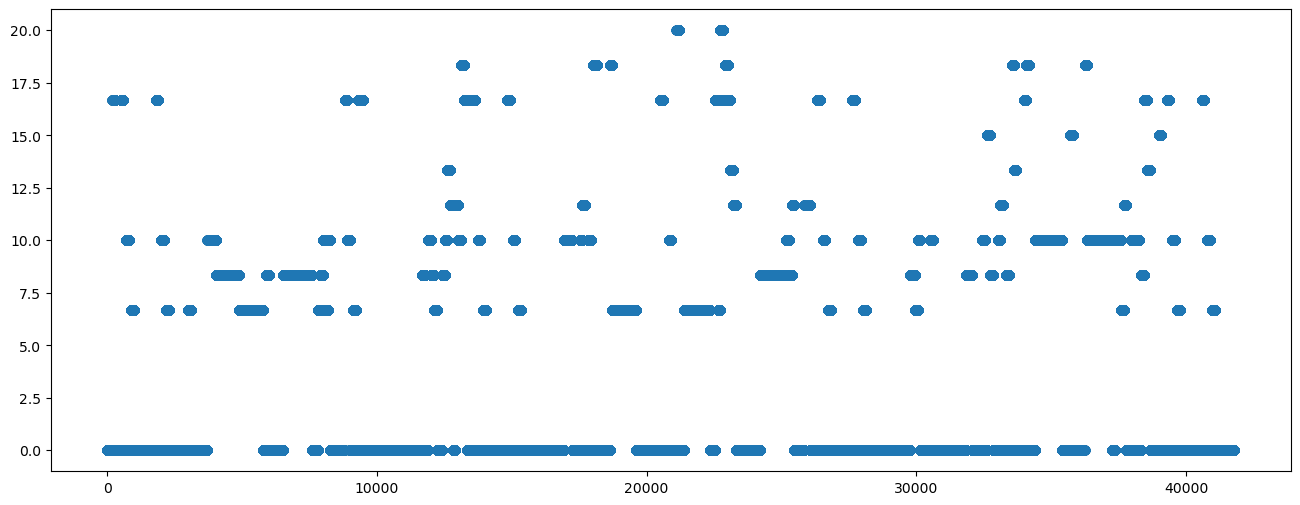

In [35]:
plt.figure(figsize=(16,6))
plt.scatter(df['Time'],df['Ethylene'])
plt.show()

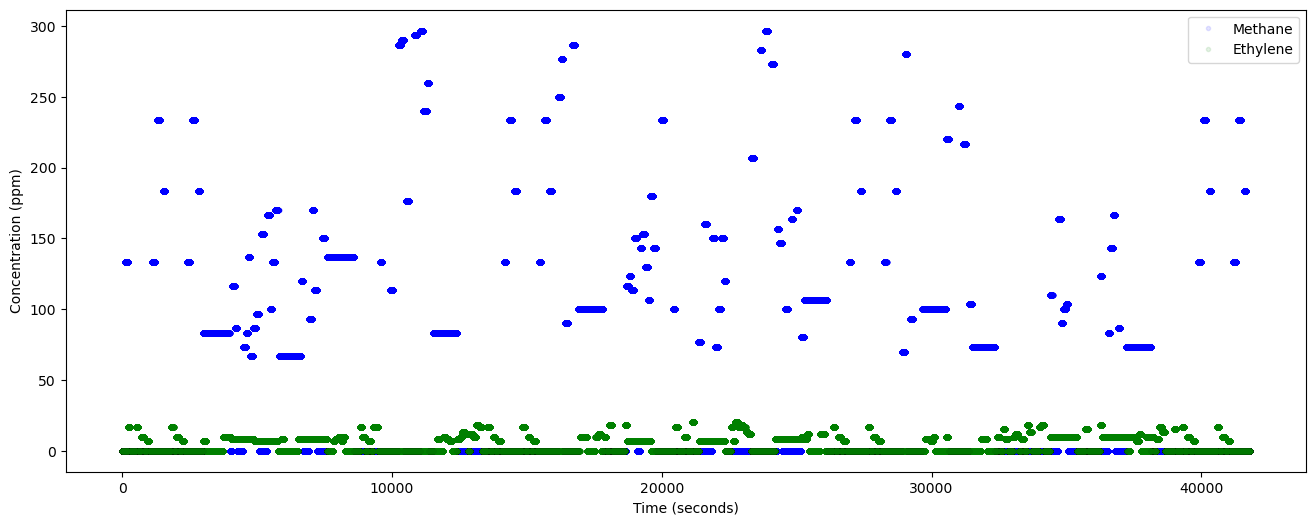

In [36]:
plt.figure(figsize=(16,6))
plt.plot(df['Time'],df['Methane'] ,'.b',alpha=.1, label='Methane')
plt.plot(df['Time'],df['Ethylene'],'.g',alpha=.1, label='Ethylene')
plt.xlabel("Time (seconds)")
plt.ylabel("Concentration (ppm)")
plt.legend(loc='upper right')
plt.show()

In [37]:
meth=df['1']
meth=meth[:100000]
t=df['Time']
t=t[:100000]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


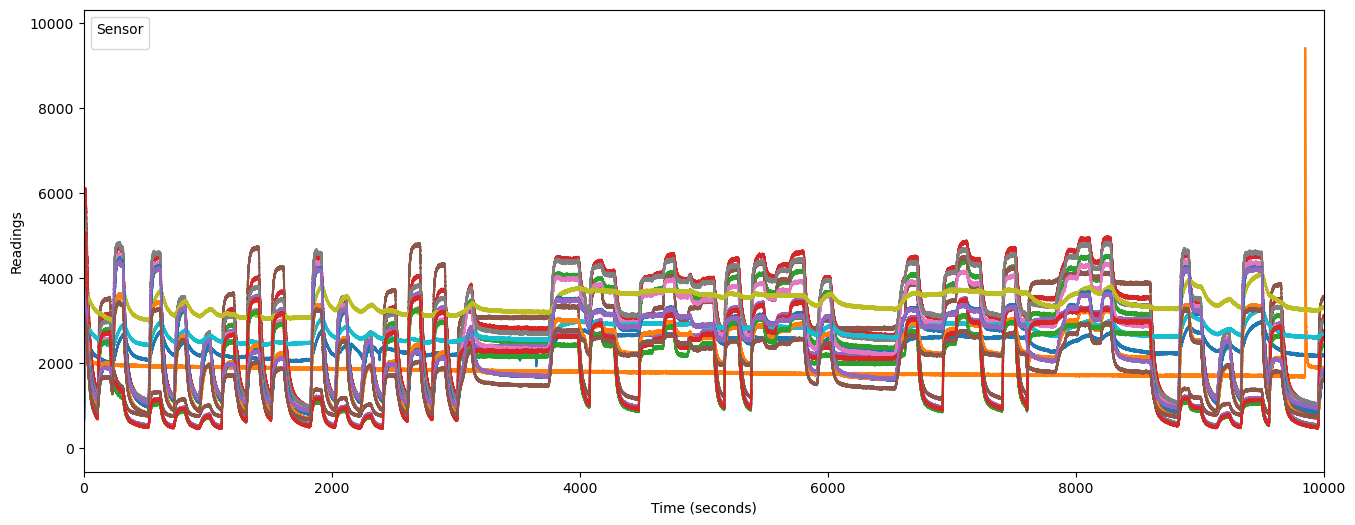

In [38]:
%matplotlib inline

plt.figure(figsize=(16,6))
plt.plot(df['Time'], df['1'])
plt.plot(df['Time'], df['2'])
plt.plot(df['Time'], df['3'])
plt.plot(df['Time'], df['4'])
plt.plot(df['Time'], df['5'])
plt.plot(df['Time'], df['6'])
plt.plot(df['Time'], df['7'])
plt.plot(df['Time'], df['8'])
plt.plot(df['Time'], df['9'])
plt.plot(df['Time'], df['10'])
plt.plot(df['Time'], df['11'])
plt.plot(df['Time'], df['12'])
plt.plot(df['Time'], df['13'])
plt.plot(df['Time'], df['14'])
plt.plot(df['Time'], df['15'])
plt.plot(df['Time'], df['16'])
plt.xlabel('Time (seconds)')
plt.ylabel('Readings')
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper left', title ="Sensor")

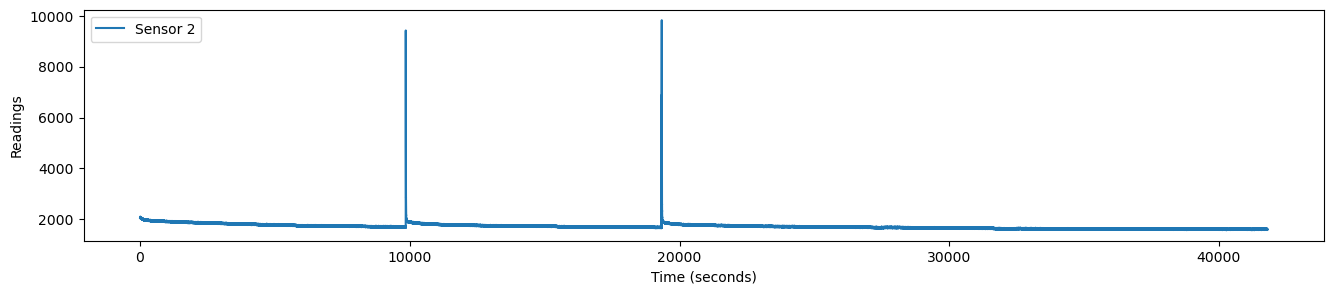

In [39]:
plt.figure(figsize=(16,3))
plt.plot(df['Time'], df['2'], label='Sensor 2')
plt.xlabel('Time (seconds)')
plt.ylabel('Readings')
plt.legend(loc='upper left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


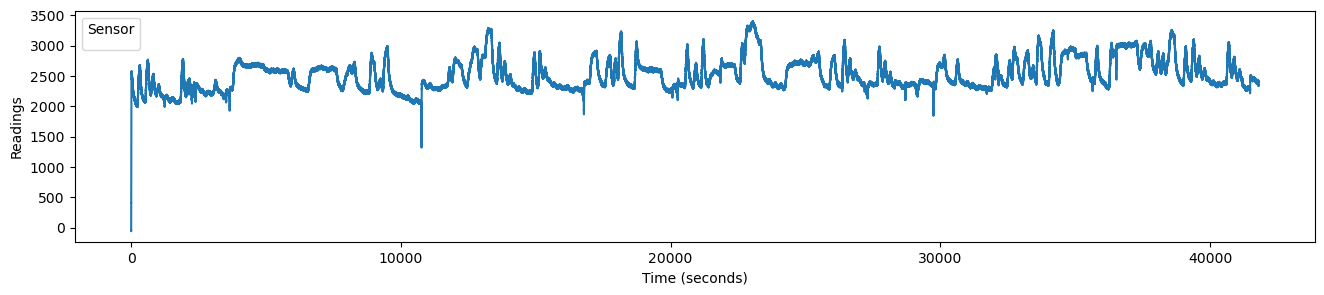

In [40]:
plt.figure(figsize=(16,3))
plt.plot(df['Time'], df['1'])
plt.xlabel('Time (seconds)')
plt.ylabel('Readings')
plt.legend(loc='upper left', title ="Sensor")

Text(0.5, 0.98, 'TGS2602 Sensors')

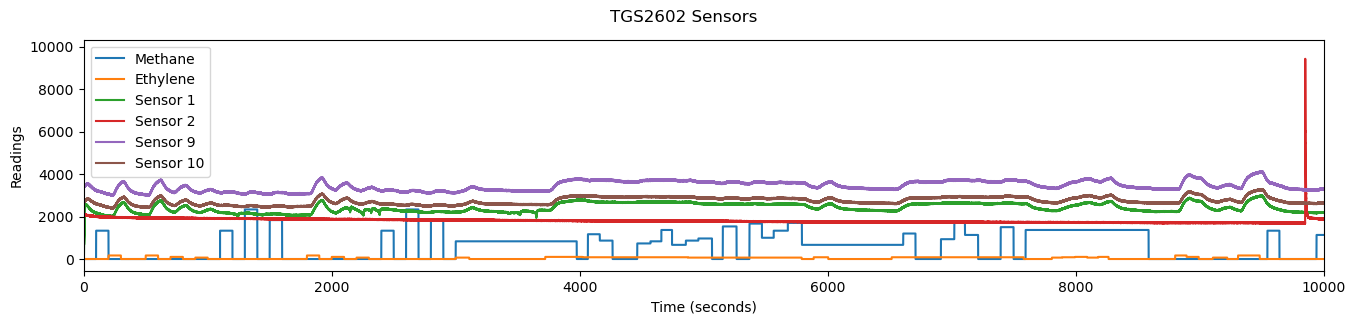

In [41]:
plt.figure(figsize=(16,3))
plt.plot(df['Time'], 10*df['Methane'] ,label='Methane')
plt.plot(df['Time'], 10*df['Ethylene'], label='Ethylene')
plt.plot(df['Time'], df['1'],label='Sensor 1')
plt.plot(df['Time'], df['2'],label='Sensor 2')
plt.plot(df['Time'], df['9'],label='Sensor 9')
plt.plot(df['Time'], df['10'],label='Sensor 10')
plt.xlabel('Time (seconds)')
plt.ylabel('Readings')
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper left')
plt.suptitle("TGS2602 Sensors")

Text(0.5, 0.98, 'TGS2600 Sensors')

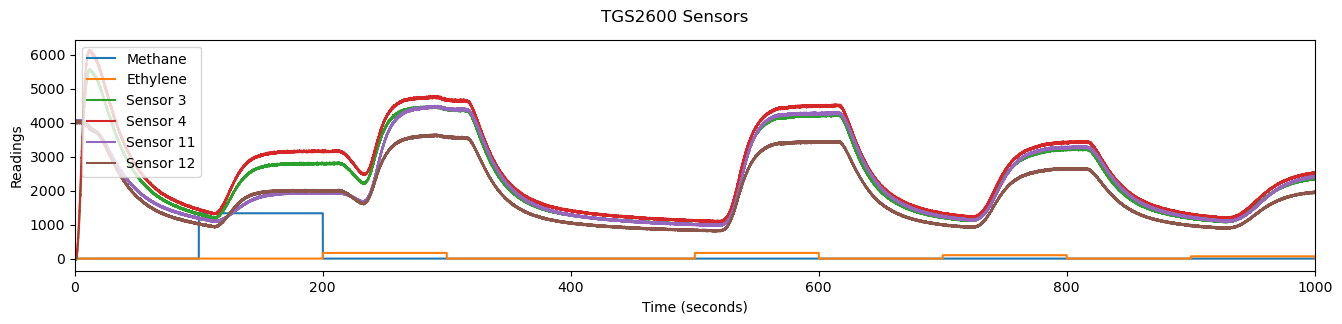

In [42]:
plt.figure(figsize=(16,3))
plt.plot(df['Time'], 10*df['Methane'] ,label='Methane')
plt.plot(df['Time'], 10*df['Ethylene'], label='Ethylene')
plt.plot(df['Time'], df['3'], label='Sensor 3')
plt.plot(df['Time'], df['4'], label='Sensor 4')
plt.plot(df['Time'], df['11'], label='Sensor 11')
plt.plot(df['Time'], df['12'], label='Sensor 12')
plt.xlabel('Time (seconds)')
plt.ylabel('Readings')
plt.axis(xmin=0, xmax=1000)
plt.legend(loc='upper left')
plt.suptitle("TGS2600 Sensors")

Text(0.5, 0.98, 'TGS2610 Sensors')

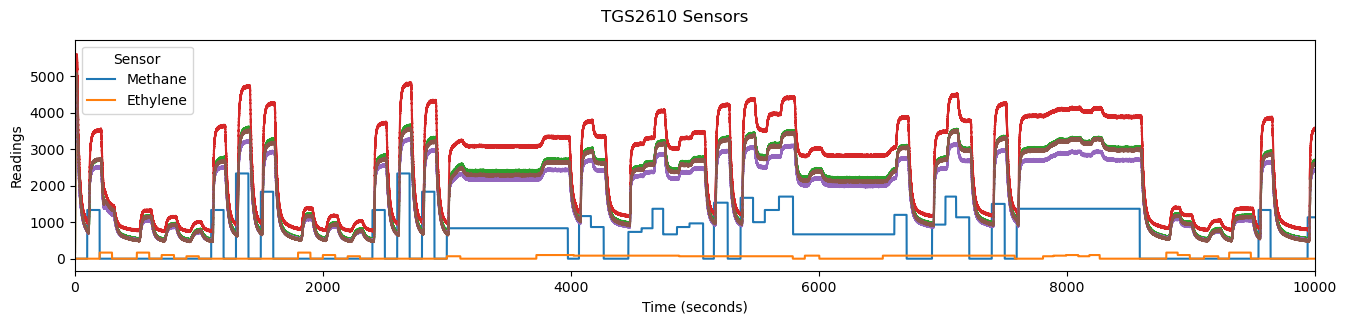

In [43]:
plt.figure(figsize=(16,3))
plt.plot(df['Time'], 10*df['Methane'] ,label='Methane')
plt.plot(df['Time'], 10*df['Ethylene'], label='Ethylene')
plt.plot(df['Time'], df['5'])
plt.plot(df['Time'], df['6'])
plt.plot(df['Time'], df['13'])
plt.plot(df['Time'], df['14'])
plt.xlabel('Time (seconds)')
plt.ylabel('Readings')
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper left', title ="Sensor")
plt.suptitle("TGS2610 Sensors")

Text(0.5, 0.98, 'TGS2620 Sensors')

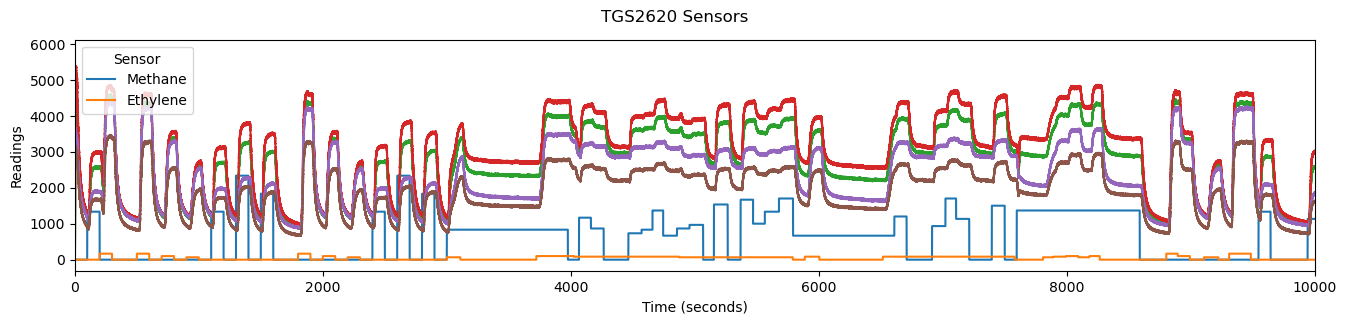

In [44]:
plt.figure(figsize=(16,3))
plt.plot(df['Time'], 10*df['Methane'] ,label='Methane')
plt.plot(df['Time'], 10*df['Ethylene'], label='Ethylene')
plt.plot(df['Time'], df['7'])
plt.plot(df['Time'], df['8'])
plt.plot(df['Time'], df['15'])
plt.plot(df['Time'], df['16'])
plt.xlabel('Time (seconds)')
plt.ylabel('Readings')
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper left', title ="Sensor")
plt.suptitle("TGS2620 Sensors")

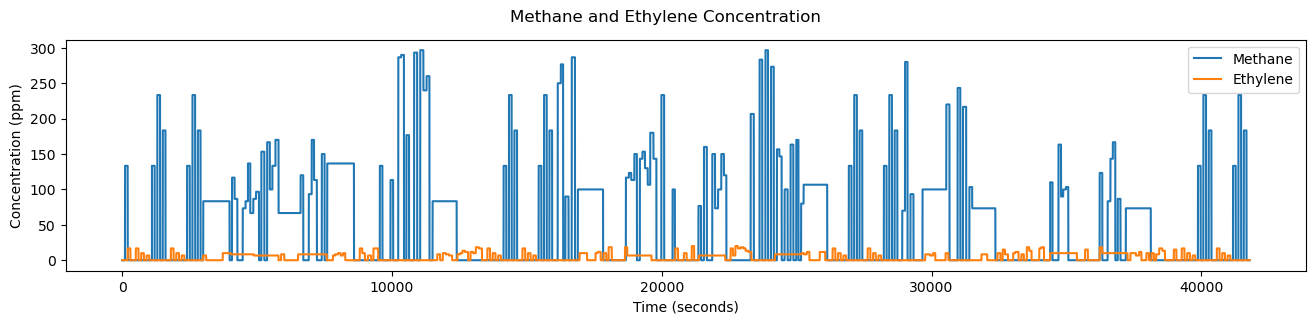

In [45]:
#Methane and Ethylene input

plt.figure(figsize=(16,3))
plt.plot(df['Time'], df['Methane'], label='Methane')
plt.plot(df['Time'], df['Ethylene'], label='Ethylene')
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration (ppm)')
plt.legend(loc='upper right')
plt.suptitle("Methane and Ethylene Concentration")
plt.show()


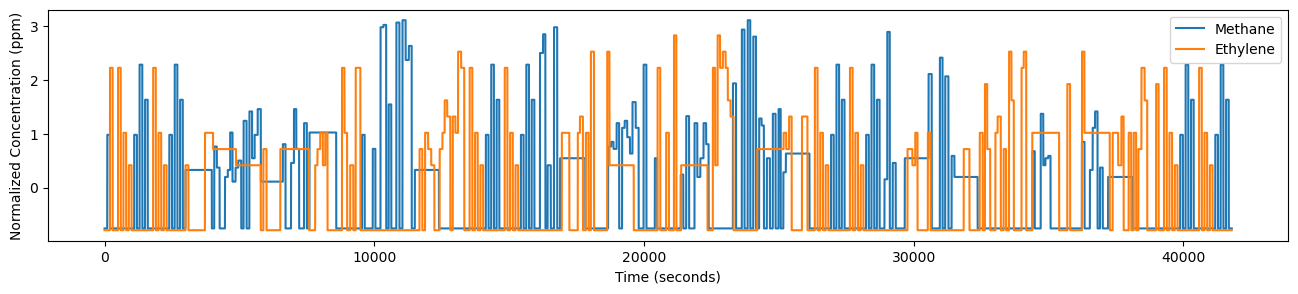

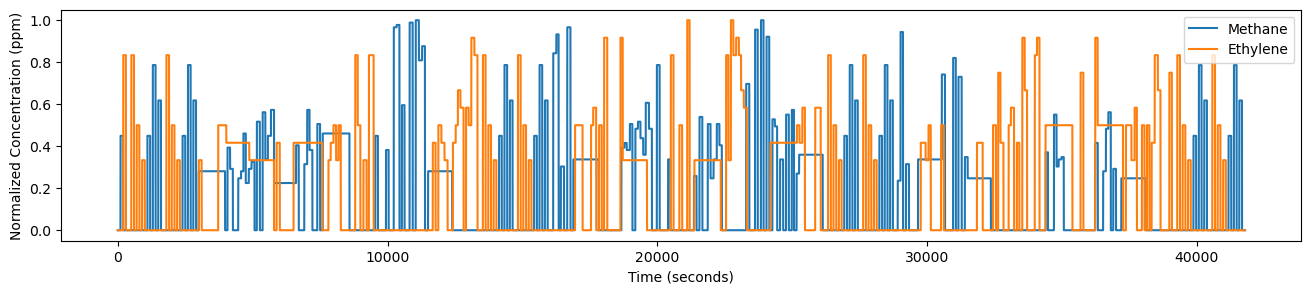

In [46]:
h = np.asarray(df['Methane']).reshape(-1,1)
g = np.asarray(df['Ethylene']).reshape(-1,1)
e = np.concatenate((h,g), axis=1)


# As data is not normalized, we will use MinMaxScaler to normalize the data

std_scaled_data = StandardScaler().fit_transform(e)
plt.figure(figsize=(16,3))
plt.plot(df['Time'], std_scaled_data[:,0], label = 'Methane')
plt.plot(df['Time'], std_scaled_data[:,1], label = 'Ethylene')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Concentration (ppm)')
plt.legend(loc='upper right')


min_max_scaled_data = MinMaxScaler().fit_transform(e)
plt.figure(figsize=(16,3))
plt.plot(df['Time'], min_max_scaled_data[:,0], label = 'Methane')
plt.plot(df['Time'], min_max_scaled_data[:,1], label = 'Ethylene')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Concentration (ppm)')
plt.legend(loc='upper right')

(0.0, 10000.0, -0.05, 1.05)

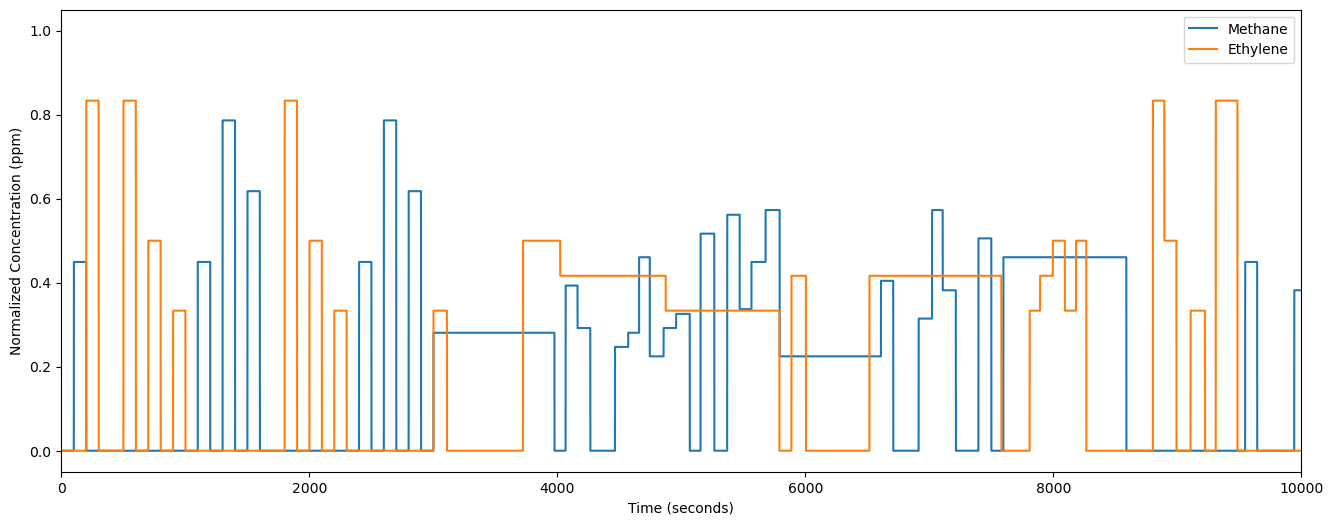

: 

In [47]:
plt.figure(figsize=(16,6))
plt.plot(df['Time'], min_max_scaled_data[:,0], label = 'Methane')
plt.plot(df['Time'], min_max_scaled_data[:,1], label = 'Ethylene')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Concentration (ppm)')
plt.legend(loc='upper right', )
plt.axis(xmin=0, xmax=10000)